# Imports 

In [1]:
import numpy as numpy
import pandas as pd 
import matplotlib.pyplot as plt 
import pickle
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import keras 
from keras.models import Sequential
from keras.layers import Dense

In [2]:
df = pd.read_csv('cancer patient data sets.csv')
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,0.0
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,1.0
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,2.0
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,2.0
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,2.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     1000 non-null   int64  
 1   Patient Id                1000 non-null   object 
 2   Age                       1000 non-null   int64  
 3   Gender                    1000 non-null   int64  
 4   Air Pollution             1000 non-null   int64  
 5   Alcohol use               1000 non-null   int64  
 6   Dust Allergy              1000 non-null   int64  
 7   OccuPational Hazards      1000 non-null   int64  
 8   Genetic Risk              1000 non-null   int64  
 9   chronic Lung Disease      1000 non-null   int64  
 10  Balanced Diet             1000 non-null   int64  
 11  Obesity                   1000 non-null   int64  
 12  Smoking                   1000 non-null   int64  
 13  Passive Smoker            1000 non-null   int64  
 14  Chest Pai

In [11]:
df.drop(columns=['index'
,'Patient Id'],inplace=True)

In [12]:
df.isnull().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [13]:
df.to_csv('cancer patient data sets.csv', index=False)

In [14]:
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0.0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1.0
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2.0
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2.0
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,2.0
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,2.0
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2.0
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2.0


# split our data to feature matrix and target column

In [15]:
X=df.drop(columns=['Level'])
y=df['Level']

In [16]:
X.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


In [17]:
y

0      0.0
1      1.0
2      2.0
3      2.0
4      2.0
      ... 
995    2.0
996    2.0
997    2.0
998    2.0
999    2.0
Name: Level, Length: 1000, dtype: float64

In [18]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [20]:
X

array([[-0.34784816, -0.81990292, -0.90667901, ..., -0.83861787,
        -0.41855027,  0.72865507],
       [-1.68123833, -0.81990292, -0.41391868, ..., -1.38459305,
         1.54417079, -0.6282445 ],
       [-0.18117439, -0.81990292,  0.07884165, ...,  1.34528283,
         1.54417079, -0.6282445 ],
       ...,
       [-1.01454325,  1.21965659,  0.07884165, ...,  1.34528283,
         1.54417079, -0.6282445 ],
       [-1.59790145,  1.21965659,  1.06436231, ...,  0.25333248,
        -0.90923053,  0.05020528],
       [ 0.81886824, -0.81990292,  1.06436231, ...,  1.34528283,
         1.54417079, -0.6282445 ]])

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

In [22]:
(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

((700, 23), (300, 23), (700,), (300,))

In [35]:
from keras.models import Sequential
from keras.layers import Dense
import keras
from keras.utils import to_categorical

# Define the model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=23))  # Input layer
model.add(Dense(16, activation='relu'))  # Hidden layer
model.add(Dense(3, activation='softmax'))  # Output layer (3 classes)

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',  # Use categorical_crossentropy for multi-class classification
              metrics=['accuracy'])

# One-hot encode the labels (if not already encoded)
y_train_encoded = to_categorical(y_train, 3)
y_test_encoded = to_categorical(y_test, 3)

# Train the model
history = model.fit(X_train, y_train_encoded, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(X_test, y_test_encoded), 
                    verbose=2)


Epoch 1/10


c:\jupyter\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 - 2s - 73ms/step - accuracy: 0.4300 - loss: 1.0293 - val_accuracy: 0.6133 - val_loss: 0.8557
Epoch 2/10
22/22 - 0s - 5ms/step - accuracy: 0.8200 - loss: 0.6357 - val_accuracy: 0.8367 - val_loss: 0.6082
Epoch 3/10
22/22 - 0s - 6ms/step - accuracy: 0.9200 - loss: 0.4282 - val_accuracy: 0.8867 - val_loss: 0.4446
Epoch 4/10
22/22 - 0s - 11ms/step - accuracy: 0.9429 - loss: 0.2996 - val_accuracy: 0.9167 - val_loss: 0.3173
Epoch 5/10
22/22 - 0s - 5ms/step - accuracy: 0.9614 - loss: 0.2129 - val_accuracy: 0.9433 - val_loss: 0.2312
Epoch 6/10
22/22 - 0s - 8ms/step - accuracy: 0.9700 - loss: 0.1581 - val_accuracy: 0.9500 - val_loss: 0.1794
Epoch 7/10
22/22 - 0s - 5ms/step - accuracy: 0.9757 - loss: 0.1223 - val_accuracy: 0.9667 - val_loss: 0.1393
Epoch 8/10
22/22 - 0s - 5ms/step - accuracy: 0.9843 - loss: 0.0957 - val_accuracy: 0.9667 - val_loss: 0.1117
Epoch 9/10
22/22 - 0s - 4ms/step - accuracy: 0.9900 - loss: 0.0762 - val_accuracy: 0.9833 - val_loss: 0.0886
Epoch 10/10
22/22 - 0s - 4ms

In [36]:

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, keras.utils.to_categorical(y_test, 3))
print('Test accuracy:', round(accuracy*100, 2), '%')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9823 - loss: 0.0772
Test accuracy: 98.33 %


In [37]:

# Evaluate the model on train data
loss, accuracy = model.evaluate(X_train, keras.utils.to_categorical(y_train, 3))
print('Test accuracy:', round(accuracy*100, 2), '%')

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9907 - loss: 0.0522
Test accuracy: 99.14 %


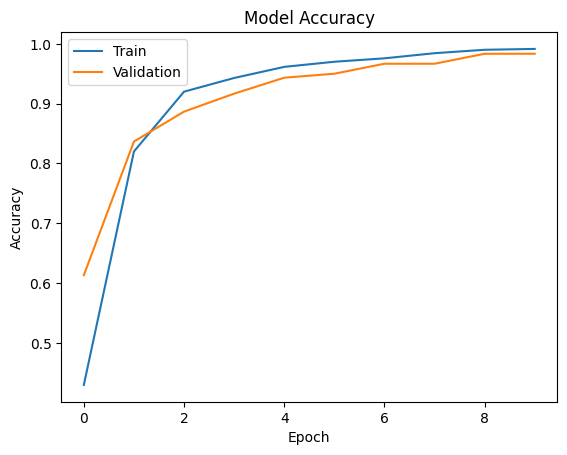

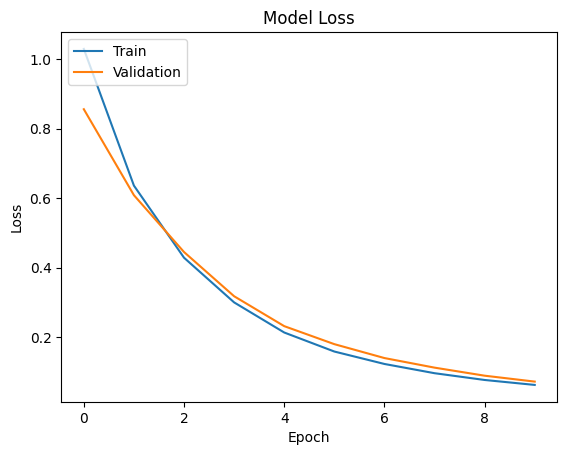

In [38]:
#plot the training and validation loss and accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [39]:
model.save('my_model.h5')
# Save the scaler object to a file
filename = 'scaler.pkl'
with open(filename, 'wb') as f:
    pickle.dump(scaler, f)

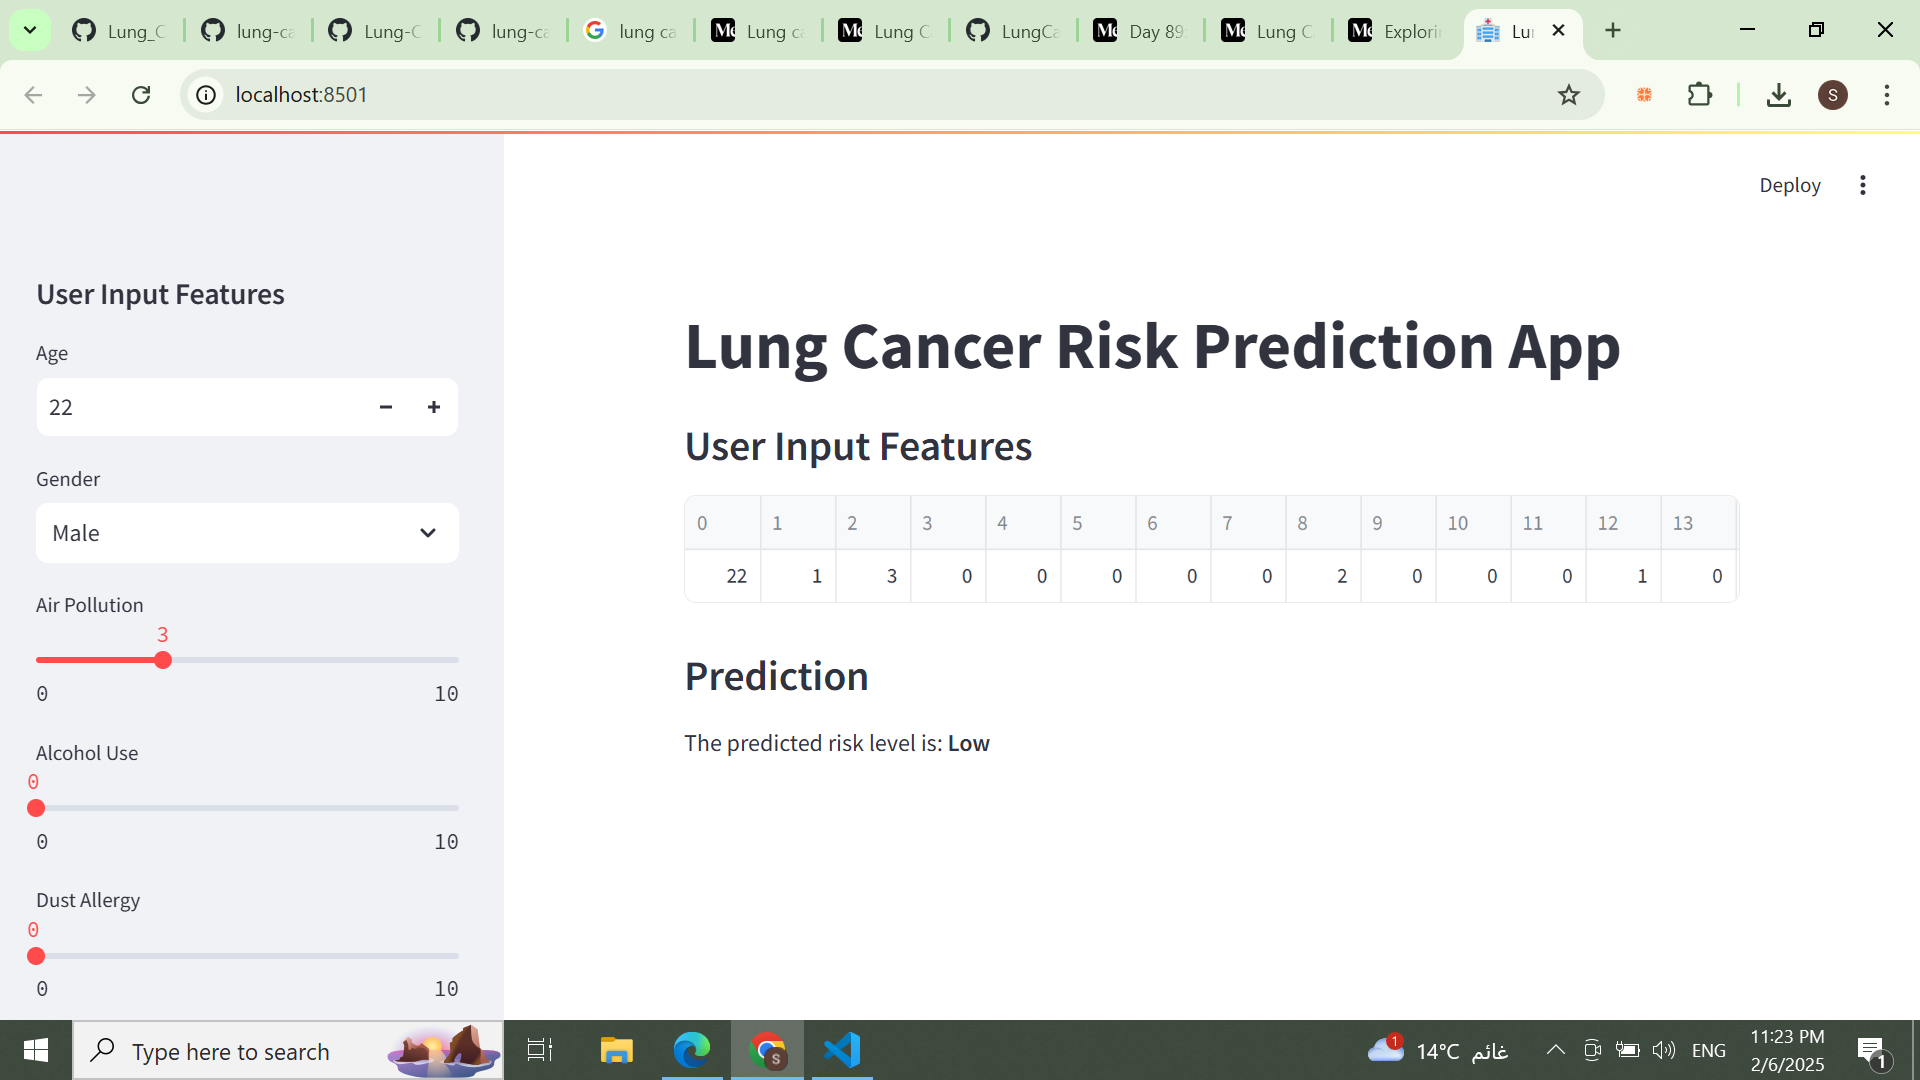